### Connect to PostgreSQL from Python

In [1]:
import psycopg2

try:
    dbConnection = psycopg2.connect(user="dap",password="dap",host="192.168.56.30",port="5432",database="postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("CREATE DATABASE aapl;")
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while connecting to PostgreSQL", dbError)
finally:
    if (dbConnection):
        dbConnection.close()

Error while connecting to PostgreSQL database "aapl" already exists



### Create a table in the new database

In [2]:
createString = """
CREATE TABLE daily_prices(
price_date date not null default current_date PRIMARY KEY,
high numeric(15,4),
low numeric(15,4),
open numeric(15,4),
close numeric(15,4),
volume numeric(15,4),
adj_close numeric(15,4)
);
"""

In [3]:
try:
    dbConnection = psycopg2.connect(user="dap",password="dap",host="192.168.56.30",port="5432",database="aapl")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute(createString)
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error while connecting to PostgreSQL", dbError)
finally:
    if (dbConnection):
        dbConnection.close()

### Populate the table on PostgreSQL

In [4]:
import csv

try:
    dbConnection = psycopg2.connect(user="dap",password="dap",host="192.168.56.30",port="5432",database="aapl")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    insertString = "INSERT INTO daily_prices VALUES ('{}',"+"{},"+"{},"+"{},"+"{},"+"{},"+"{})"
    with open ('aapl.csv', 'r') as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            dbCursor.execute(insertString.format(*row))
    dbCursor.close()
except (Exception, psycopg2.Error) as dbError:
    print("Error: ", dbError)
finally:
    if (dbConnection):
        dbConnection.close()

### Query Table

In [22]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2

sql = """
    SELECT 
    EXTRACT(MONTH FROM price_date) AS month,
    AVG(open) AS avg_op,
    AVG(low) AS avg_lo,
    AVG(high) AS avg_hi,
    AVG(adj_close) AS avg_cl
    FROM daily_prices
    GROUP BY month;
    """
try:
    dbConnection = psycopg2.connect(user="dap",password="dap",host="192.168.56.30",port="5432",database="aapl")
    price_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception, psycopg2.Error) as dbError:
    print("Error: ", dbError)
finally:
    if (dbConnection):
        dbConnection.close()  
        
print(price_dataframe)

    month      avg_op      avg_lo      avg_hi      avg_cl
0     3.0  164.806957  162.939130  167.164348  164.565952
1     7.0  148.436500  147.141500  150.766000  149.215355
2     8.0  166.956522  165.533913  168.589565  166.569487
3     5.0  148.324286  145.364286  150.950952  147.934524
4    10.0  144.105714  142.480476  146.800476  144.773167
5    11.0  146.395263  143.830000  148.166316  145.936332
6     9.0  153.284286  150.893333  155.308571  152.749462
7     4.0  167.479000  165.083000  169.518500  166.069710
8     1.0  170.201500  167.639500  172.448000  168.881345
9     2.0  169.635263  167.580526  171.585263  169.030253
10    6.0  139.945714  138.111429  141.919048  139.373452


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


## Display bar chart of temperatures by month

<AxesSubplot:xlabel='month', ylabel='avg_hi'>

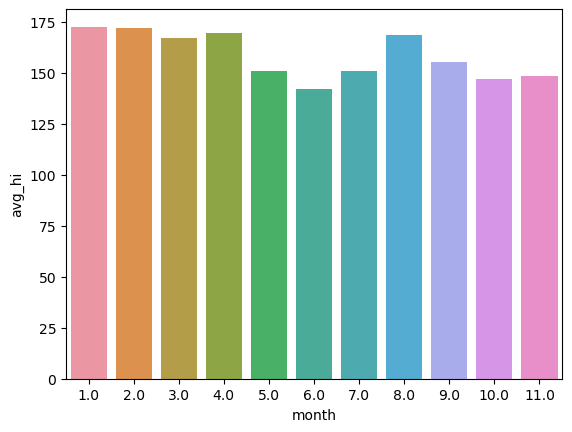

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="month",y="avg_hi",data=price_dataframe)

## Querying and visualising the data

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


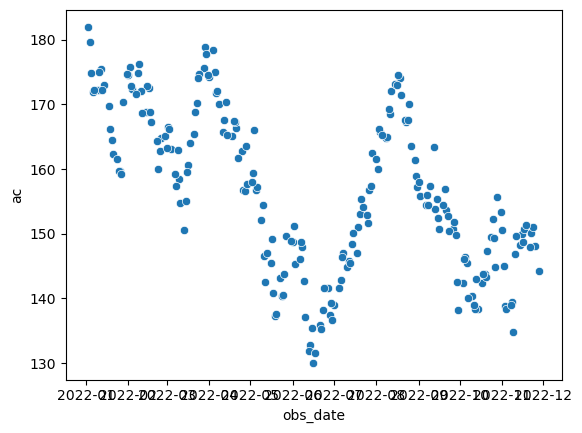

In [28]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

sql = """
    SELECT price_date AS obs_date, MIN(open) AS ao, MIN(close) AS ac
    FROM daily_prices
    GROUP BY obs_date;
    """
try:
    dbConnection = psycopg2.connect(user="dap",password="dap",host="192.168.56.30",port="5432",database="aapl")
    weather_dataframe = sqlio.read_sql_query(sql, dbConnection)
    sns.scatterplot(x="obs_date", y="ac",data=weather_dataframe);
except (Exception, psycopg2.Error) as dbError:
    print("Error: ", dbError)
finally:
    if (dbConnection):
        dbConnection.close()  
        